<a href="https://colab.research.google.com/github/khalidmahamud/plant_disease_detection/blob/main/plant_disease_classification_v_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'plantvillage-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F277323%2F658267%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240923%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240923T140155Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D920b8bccf7bbf153914d53085fc11f7ad7aa5eaa7f03ccdbc7c67c497612fe4b6aaf8b167f180e2055b12654ceea218871126f0bd6cbbfb10704faa4eaad7b480cdb6bbbe47cf50e728669ad0cffc202e69e97d2f38580f3e89856d16e45e87d4b0e8cdfc7a8a2e8deb541a31ead08a2549030291e743d93b6bc8374988342a95e8fe4424384133efa42df7fe6101df83941a4ffdd59f1193f53ec9c497b4814e24a5dd9228d3ba75a69c091fcf62c8d20f4ad125f329b53e2bb7ec79c98eac34f22c2e1334613fdcf5eb369210f10e16ec5eeac0085381cdeffed8c2046cdb2d277a3c3582cdc2f0b2fa0bdbdf1db4141e900ed866528de0530cc2f2e5dabf9'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Set the path to where the dataset is extracted
dataset_path = '/kaggle/input/plantvillage-dataset/color'

apple_directories = []

# Walk through the dataset path
for root, dirs, files in os.walk(dataset_path):
    for dir_name in dirs:
        # Check if 'Apple' is in the directory name
        if 'Apple' in dir_name:
            apple_directories.append(os.path.join(root, dir_name))

# Print the apple directories
for directory in apple_directories:
    print(directory)


/kaggle/input/plantvillage-dataset/color/Apple___Apple_scab
/kaggle/input/plantvillage-dataset/color/Apple___Black_rot
/kaggle/input/plantvillage-dataset/color/Apple___Cedar_apple_rust
/kaggle/input/plantvillage-dataset/color/Apple___healthy


In [ ]:
image_paths = []
labels = []

In [ ]:
# Define a mapping from directory names to labels
label_mapping = {
    "Apple___healthy": 0,
    "Apple___Apple_scab": 1,
    "Apple___Black_rot": 2,
    "Apple___Cedar_apple_rust": 3,
}

# Iterate through all the tomato directories
for directory in tomato_directories:
    # Get the label based on the directory name
    dir_name = os.path.basename(directory)  # Get the last part of the path
    label = label_mapping.get(dir_name, None)  # Get the corresponding label

    if label is not None:  # Proceed only if the label exists
        # Get all image files in the directory
        file_count = 0
        for file in os.listdir(directory):
            if file.lower().endswith(('.jpg', '.png', '.jpeg')):
                image_paths.append(os.path.join(directory, file))
                labels.append(str(label))  # Append the label
                file_count += 1
        print(f"Directory: {directory}, Added {file_count} files.")
    else:
        print(f"Warning: No label found for directory {dir_name}")

print(f"Total images processed: {len(image_paths)}")

Directory: /kaggle/input/plantvillage-dataset/color/Apple___Apple_scab, Added 630 files.
Directory: /kaggle/input/plantvillage-dataset/color/Apple___Black_rot, Added 621 files.
Directory: /kaggle/input/plantvillage-dataset/color/Apple___Cedar_apple_rust, Added 275 files.
Directory: /kaggle/input/plantvillage-dataset/color/Apple___healthy, Added 1645 files.
Total images processed: 3171


In [ ]:
# Create a DataFrame to store the image paths and their labels
df = pd.DataFrame({
    'image_path': image_paths,
    'label': labels
})

df.head(5)

,image_path,label
0,/kaggle/input/plantvillage-dataset/color/Apple...,1
1,/kaggle/input/plantvillage-dataset/color/Apple...,1
2,/kaggle/input/plantvillage-dataset/color/Apple...,1
3,/kaggle/input/plantvillage-dataset/color/Apple...,1
4,/kaggle/input/plantvillage-dataset/color/Apple...,1


In [ ]:
print(df['label'].value_counts())  # Counts the number of images for each label

label
0    1645
1     630
2     621
3     275
Name: count, dtype: int64


In [ ]:
# Define X and y
X = df['image_path']  # Your feature (image paths)
y = df['label']       # Your labels

In [ ]:
from sklearn.model_selection import train_test_split

# First, split into training+validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Then split the training+validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, stratify=y_train_val, random_state=42
)


# Create DataFrames for each split
df_train = pd.DataFrame({'image_path': X_train, 'label': y_train})
df_val = pd.DataFrame({'image_path': X_val, 'label': y_val})
df_test = pd.DataFrame({'image_path': X_test, 'label': y_test})

# Print the sample counts
print(f"Training samples: {len(df_train)}, Validation samples: {len(df_val)}, Test samples: {len(df_test)}")


Training samples: 2028, Validation samples: 508, Test samples: 635


In [ ]:
from imblearn.over_sampling import RandomOverSampler  # For oversampling

# Oversampling to handle class imbalance in training data
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(np.array(X_train).reshape(-1, 1), y_train)

# Create a new DataFrame with resampled data
df_train_resampled = pd.DataFrame({
    'image_path': X_train_resampled.flatten(),
    'label': y_train_resampled
})

In [ ]:
# Check class distribution in each set
train_class_distribution = y_train.value_counts()
resampled_train_class_distribution = y_train_resampled.value_counts()
val_class_distribution = y_val.value_counts()
test_class_distribution = y_test.value_counts()

print("Training Class Distribution:\n", train_class_distribution)
print("Resampled Training Class Distribution:\n", resampled_train_class_distribution)
print("\nValidation Class Distribution:\n", val_class_distribution)
print("\nTest Class Distribution:\n", test_class_distribution)

Training Class Distribution:
 label
0    1052
1     403
2     397
3     176
Name: count, dtype: int64
Resampled Training Class Distribution:
 label
0    1052
1    1052
2    1052
3    1052
Name: count, dtype: int64

Validation Class Distribution:
 label
0    263
1    101
2    100
3     44
Name: count, dtype: int64

Test Class Distribution:
 label
0    330
1    126
2    124
3     55
Name: count, dtype: int64


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights for the training set
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_resampled), y=y_train_resampled)
class_weights = dict(enumerate(class_weights))

print("Class Weights:", class_weights)

Class Weights: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Data Augmentation with added options
data_augmentation = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,  # Increased rotation range
    width_shift_range=0.3,  # Increased width shift
    height_shift_range=0.3,  # Increased height shift
    brightness_range=[0.8, 1.2],  # Brightness augmentation
    zoom_range=0.2,  # Added zoom
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generators
train_generator = data_augmentation.flow_from_dataframe(
    dataframe=df_train_resampled,
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,  # Increased batch size
    class_mode='sparse'
)

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_dataframe(
    dataframe=df_val,
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col='image_path',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

Found 4208 validated image filenames belonging to 4 classes.
Found 508 validated image filenames belonging to 4 classes.
Found 635 validated image filenames belonging to 4 classes.


In [ ]:
from tensorflow.keras.applications import ResNet50, InceptionV3, EfficientNetB0
from tensorflow.keras.layers import Input, Concatenate, Dense, GlobalAveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.regularizers import l2

# Load pre-trained ResNet50
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet_base.trainable = False  # Freeze ResNet50 layers

# Load pre-trained InceptionV3
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
inception_base.trainable = False  # Freeze InceptionV3 layers

# Load pre-trained EfficientNetB0
efficientnet_base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
efficientnet_base.trainable = False  # Freeze EfficientNetB0 layers

# Define the input
input_layer = Input(shape=(224, 224, 3))

# Extract features from ResNet50, InceptionV3, and EfficientNetB0
resnet_features = resnet_base(input_layer)
resnet_features = MaxPooling2D(pool_size=(2, 2))(resnet_features)  # Apply MaxPooling
resnet_features = GlobalMaxPooling2D()(resnet_features)

inception_features = inception_base(input_layer)
inception_features = MaxPooling2D(pool_size=(2, 2))(inception_features)  # Apply MaxPooling
inception_features = GlobalMaxPooling2D()(inception_features)

efficientnet_features = efficientnet_base(input_layer)
efficientnet_features = MaxPooling2D(pool_size=(2, 2))(efficientnet_features)  # Apply MaxPooling
efficientnet_features = GlobalMaxPooling2D()(efficientnet_features)

# Concatenate the features
combined_features = Concatenate()([resnet_features, inception_features, efficientnet_features])

# Add a fully connected layer
fc_layer = Dense(512, activation='relu', kernel_regularizer=l2(0.001))(combined_features)  # Increase size of FC layer
dropout_layer = Dropout(0.5)(fc_layer)  # Dropout for regularization

# Output layer
output_layer = Dense(len(np.unique(y_train_resampled)), activation='softmax')(dropout_layer)

# Build the model
ensemble_model = Model(inputs=input_layer, outputs=output_layer)

# Unfreeze more layers of ResNet50, InceptionV3, and EfficientNetB0
for layer in resnet_base.layers[-20:]:
    layer.trainable = True

for layer in inception_base.layers[-20:]:
    layer.trainable = True

for layer in efficientnet_base.layers[-20:]:
    layer.trainable = True

# Compile the model with class weights
fine_tune_learning_rate = 1e-5  # Lower learning rate for fine-tuning
ensemble_model.compile(optimizer=Adam(learning_rate=fine_tune_learning_rate),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

ensemble_model.summary()



94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 7, 7,      │ 23,587,712 │ input_layer_3[0]… │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ inception_v3        │ (None, 5, 5,      │ 21,802,784 │ input_layer_3[0]… │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ efficientnetb0      │ (None, 7, 7,      │  4,049,571 │ input_layer_3[0]… │
│ (Functional)        │ 1280)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 3, 3,      │          0 │ resnet50[0][0]    │
│ (MaxPooling2D)      │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 2, 2,      │          0 │ inception_v3[0][… │
│ (MaxPooling2D)      │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 3, 3,      │          0 │ efficientnetb0[0… │
│ (MaxPooling2D)      │ 1280)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 2048)      │          0 │ max_pooling2d_4[… │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 2048)      │          0 │ max_pooling2d_5[… │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 1280)      │          0 │ max_pooling2d_6[… │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 5376)      │          0 │ global_max_pooli… │
│ (Concatenate)       │                   │            │ global_max_pooli… │
│                     │                   │            │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 512)       │  2,753,024 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 512)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 4)         │      2,052 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 52,195,143 (199.11 MB)

 Trainable params: 14,972,724 (57.12 MB)

 Non-trainable params: 37,222,419 (141.99 MB)

In [ ]:
# Add callbacks (early stopping, model checkpoint)
checkpoint_loss = ModelCheckpoint('best_model_loss.keras', monitor='val_loss', save_best_only=True, verbose=1)
checkpoint_accuracy = ModelCheckpoint('best_model_accuracy.keras', monitor='val_accuracy', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=7, verbose=1)

# Train the model
history_fine_tune = ensemble_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,  # Train for a larger number of epochs
    callbacks=[checkpoint_loss, checkpoint_accuracy, early_stopping]
)


Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1727095960.967770     103 service.cc:145] XLA service 0x7a30e0024250 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727095960.967817     103 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1727095960.967821     103 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1727096009.490593     103 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 817ms/step - accuracy: 0.4165 - loss: 3.2113
Epoch 1: val_loss improved from inf to 2.79596, saving model to best_model_loss.keras

Epoch 1: val_accuracy improved from -inf to 0.32087, saving model to best_model_accuracy.keras
132/132 ━━━━━━━━━━━━━━━━━━━━ 231s 1s/step - accuracy: 0.4170 - loss: 3.2067 - val_accuracy: 0.3209 - val_loss: 2.7960
Epoch 2/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step - accuracy: 0.6253 - loss: 1.8640
Epoch 2: val_loss improved from 2.79596 to 2.18743, saving model to best_model_loss.keras

Epoch 2: val_accuracy improved from 0.32087 to 0.45079, saving model to best_model_accuracy.keras
132/132 ━━━━━━━━━━━━━━━━━━━━ 68s 493ms/step - accuracy: 0.6256 - loss: 1.8634 - val_accuracy: 0.4508 - val_loss: 2.1874
Epoch 3/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - accuracy: 0.7185 - loss: 1.6328
Epoch 3: val_loss improved from 2.18743 to 1.42678, saving model to best_model_loss.keras

Epoch 3: val_accuracy improved from 0.45079 to 

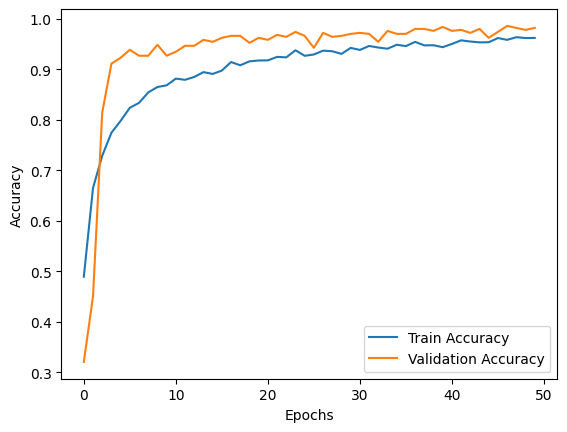

In [ ]:
import matplotlib.pyplot as plt

# Plot the training history
plt.plot(history_fine_tune.history['accuracy'], label='Train Accuracy')
plt.plot(history_fine_tune.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

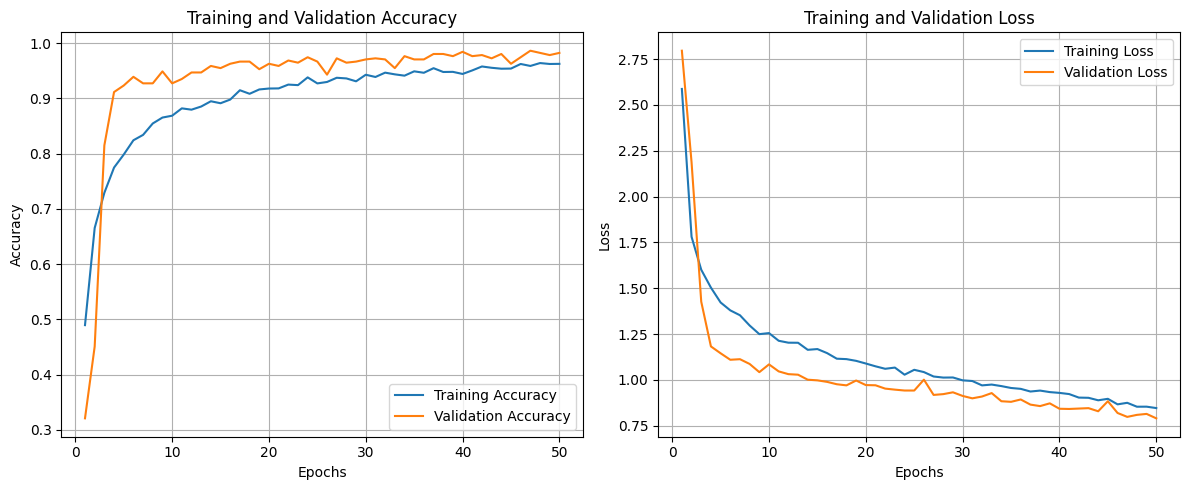

In [ ]:
# Extracting accuracy and loss from the history
epochs = range(1, len(history_fine_tune.history['accuracy']) + 1)
train_accuracy = history_fine_tune.history['accuracy']
val_accuracy = history_fine_tune.history['val_accuracy']
train_loss = history_fine_tune.history['loss']
val_loss = history_fine_tune.history['val_loss']

# Plotting accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = ensemble_model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy:.4f}, Test loss: {test_loss:.4f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9768 - loss: 0.8019 
Test accuracy: 0.9780, Test loss: 0.7996


In [ ]:
from sklearn.metrics import classification_report

# Get predictions
y_pred = ensemble_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report
y_test_numeric = np.array([int(label) for label in y_test])

# Print classification report
print(classification_report(y_test_numeric, y_pred_classes))


20/20 ━━━━━━━━━━━━━━━━━━━━ 32s 906ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       330
           1       0.98      0.94      0.96       126
           2       0.98      0.98      0.98       124
           3       1.00      0.98      0.99        55

    accuracy                           0.98       635
   macro avg       0.98      0.97      0.98       635
weighted avg       0.98      0.98      0.98       635



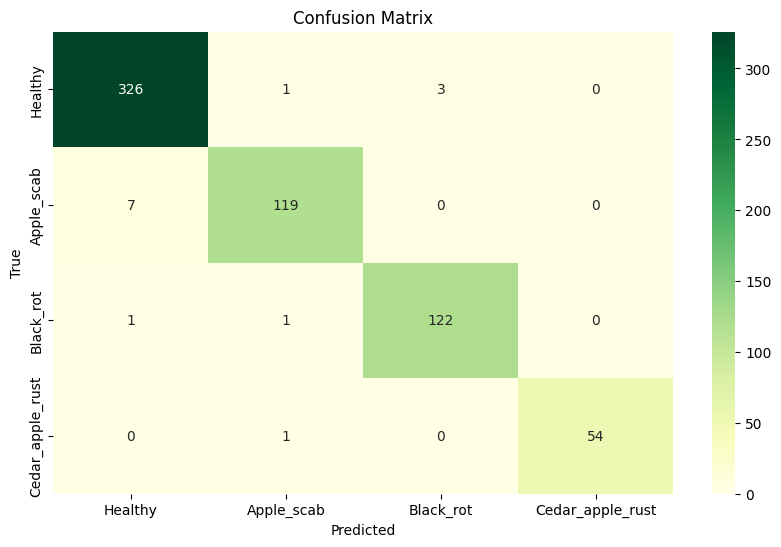

                  precision    recall  f1-score   support

         Healthy       0.98      0.99      0.98       330
      Apple_scab       0.98      0.94      0.96       126
       Black_rot       0.98      0.98      0.98       124
Cedar_apple_rust       1.00      0.98      0.99        55

        accuracy                           0.98       635
       macro avg       0.98      0.97      0.98       635
    weighted avg       0.98      0.98      0.98       635



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Define class names
class_names = [
    "Healthy",
    "Apple_scab",
    "Black_rot",
    "Cedar_apple_rust"
]

# Compute confusion matrix
cm = confusion_matrix(y_test_numeric, y_pred_classes)

# Visualize confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGn', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
report = classification_report(y_test_numeric, y_pred_classes, target_names=class_names)
print(report)
